In [1]:
%load_ext autoreload
%autoreload 2
import distance
import pandas as pd
import numpy as np
import data_tables
import interpolation
import age_analysis
import seaborn as sns
from matplotlib import pyplot as plt
import alignment
from IPython.display import display, Markdown
import math
import simulation
from skbio import TreeNode
from skbio.diversity import beta_diversity
import skbio.diversity 
from io import StringIO
import local_dtw
import pcoa as my_pcoa
from skbio.stats.distance import DistanceMatrix
from skbio.stats.ordination import pcoa
from statsmodels.stats import contingency_tables
import random
import scipy
import sklearn
import Config
from sklearn.ensemble import RandomForestRegressor



/home/ranarmoni/anaconda3/envs/MicrobiomeAlignment/lib/python3.6/site-packages/skbio/util/_testing.py:16: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
bangladesh_metadata = pd.read_pickle("./precomputed_data/bangladesh_metadata")
bangladesh_counts = pd.read_pickle("./precomputed_data/bangladesh_counts")

DI_metadata = pd.read_pickle("./precomputed_data/DI_metadata")
DI_counts = pd.read_pickle("./precomputed_data/DI_counts")

bokulich_metadata = pd.read_pickle("./precomputed_data/bokulich_metadata")
bokulich_counts = pd.read_pickle("./precomputed_data/bokulich_counts")

In [5]:
config2 = Config.Config(abundance_threshold = 0.005,max_age = 730,min_max_age=600,window_size = 10,top_predictors_for_age_analysis=0)

In [6]:
bangladesh_data_2 = data_tables.ta_data(bangladesh_metadata,counts=bangladesh_counts,config=config2)

warning - abundance dowsn't sum up to 1


In [7]:
DI_data_2 = data_tables.ta_data(DI_metadata,counts=DI_counts,config=config2)

In [8]:
bokulich_data_2 = data_tables.ta_data(bokulich_metadata,counts=bokulich_counts,config=config2)

warning - abundance dowsn't sum up to 1
warning - abundance dowsn't sum up to 1


In [9]:
DI_distance_2 = distance.calculate_bray_curtis_table(DI_data_2.abundance,DI_data_2.abundance)    

In [10]:
bokulich_distance_2 = distance.calculate_bray_curtis_table(bokulich_data_2.abundance,bokulich_data_2.abundance)    

In [11]:
bangladesh_distance_2 = distance.calculate_bray_curtis_table(bangladesh_data_2.abundance,bangladesh_data_2.abundance)    

In [12]:
bangladesh_results_2 = age_analysis.alternative_predict_ages_for_n_contigs(range(1,6), 5, 300, bangladesh_data_2, config2, distance_matrix=bangladesh_distance_2, how="first",measurements=None,input_type="distance")

In [13]:
DI_results_2 = age_analysis.alternative_predict_ages_for_n_contigs(range(1,6), 5, 300, DI_data_2, config=config2, distance_matrix=DI_distance_2, how="first", measurements=None,input_type="distance")

In [14]:
bokulich_results_2 = age_analysis.alternative_predict_ages_for_n_contigs(range(1,6), 5, 300, bokulich_data_2, config2, distance_matrix=bokulich_distance_2, how="first", measurements=None,input_type="distance")

In [93]:
def plot_alternative_results(results):
    for_plot = [results[["true",column]] for column in results.columns[3:]]
    ax = age_analysis.plot_age_prediction(for_plot,label="DI_filtered_results",color="g")
    plt.show()

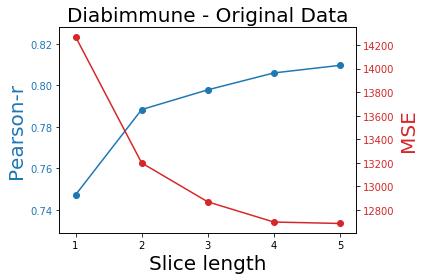

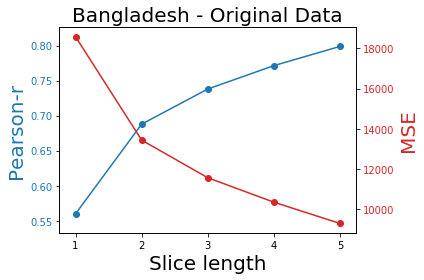

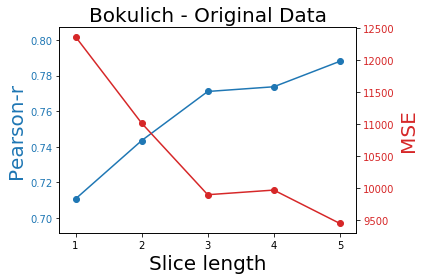

In [20]:
age_analysis.plot_alternative_results(DI_results_2,title="Diabimmune - Original Data")
age_analysis.plot_alternative_results(bangladesh_results_2,title="Bangladesh - Original Data")
age_analysis.plot_alternative_results(bokulich_results_2,title="Bokulich - Original Data")
